# Метод опорных векторов, ядра, оценка классификаторов

Переименуйте ваше решение в формате <Фамилия>_<Имя>.ipynb, например Ivanov_Ivan.ipynb для удобства проверки. Вы присылаете только его, без данных и сопроводительных файлов. 

Все результаты приводите с точностью 3 знака после запятой.

#### Будем классифицировать несбалансированные 2х-мерные классы:

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


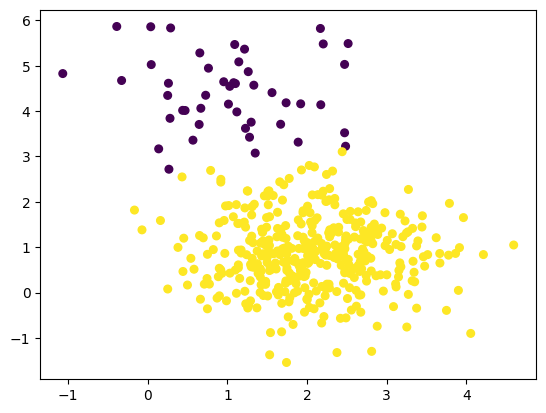

In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=(60,600),cluster_std=0.8, random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)

#### 1) Настройте SVM-классификаторы с линейным ядром и параметрами регуляризации C=10 и С=0.1.
Так как классы несбалансированы, установите параметр class_weight='balanced'. Для настройки классификатора используйте класс sklearn.svm.SVC. 

#### 2) Отобразите на графике обучающую выборку (воспользуйтесь pyplot.scatter), добавьте разделяющую прямую и опорные вектора.
(для визуализации разделяющей прямой и опорных векторов воспользуйтесь готовой функцией plot_svc_decision_function)

In [53]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(
        X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    if plot_support:
        #        print(model.support_vectors_[:, 0],model.support_vectors_[:, 1])
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300,
            linewidth=1,
            alpha=0.1,
            c=[0.5, 0.5, 0.5],
        )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/var/folders/n6/c7nnl1296qv17rrpz748kq380000gq/T/ipykernel_30425/1315924818.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


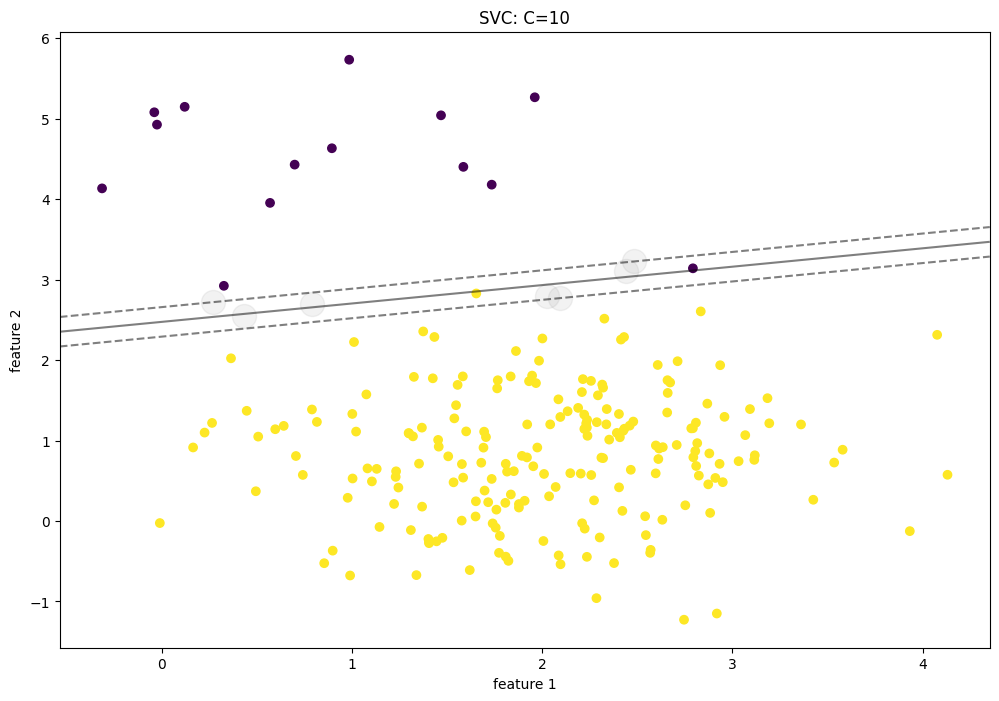

In [54]:
svc_10 = SVC(kernel="linear", C=10, class_weight="balanced")
svc_10.fit(X_train, y_train)
y_pred_10 = svc_10.predict(X_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_10)
plt.title("SVC: C=10")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_svc_decision_function(svc_10)

/var/folders/n6/c7nnl1296qv17rrpz748kq380000gq/T/ipykernel_30425/1315924818.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


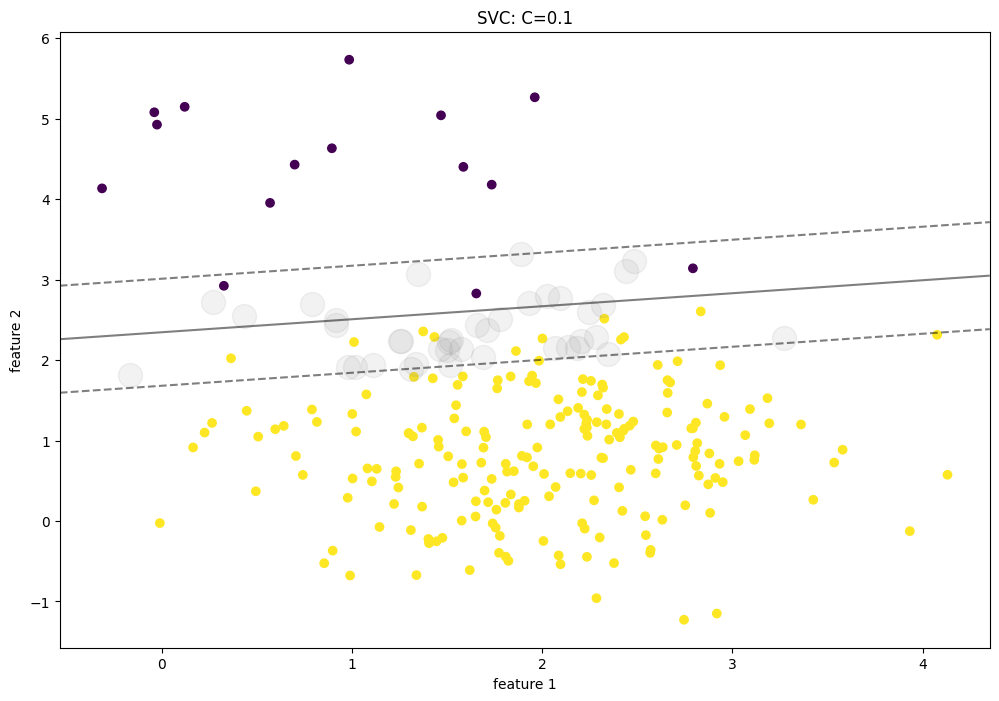

In [55]:
svc_01 = SVC(kernel="linear", C=0.1, class_weight="balanced")
svc_01.fit(X_train, y_train)
y_pred_01 = svc_01.predict(X_test)


plt.figure(figsize=(12, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_01)
plt.title("SVC: C=0.1")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_svc_decision_function(svc_01)
plt.show()

#### 3) Выведите

Для С=0.1:

    1. число опорных вектров для каждого класса
    2. Зазор M между классами (=2/(||w||)
    3. число объектов-нарушителей на обучающей выборке
    
Для С=10:

    4. число опорных вектров для каждого класса
    5. Зазор M между классами
    6. число объектов-нарушителей на обучающей выборке
    

In [56]:
n_support_vectors = svc_01.n_support_
w = svc_01.coef_[0]
margin = 2 / np.linalg.norm(w)
decision_function = svc_01.decision_function(X_train)
bad_dots_num = np.sum(y_train * decision_function < 1)  # y_i (w^T x_i + b) < 1

print(f"C=0.1:")
print(f"Num of support vectors for each class: {n_support_vectors}")
print("Margin: {:.3f}".format(margin))
print(f"Number of offenders: {bad_dots_num}\n")

C=0.1:
Num of support vectors for each class: [ 4 35]
Margin: 1.313
Number of offenders: 80



In [57]:
n_support_vectors = svc_10.n_support_
w = svc_10.coef_[0]
margin = 2 / np.linalg.norm(w)
decision_function = svc_10.decision_function(X_train)
bad_dots_num = np.sum(y_train * decision_function < 1)  # y_i (w^T x_i + b) < 1

print(f"C=10:")
print(f"Num of support vectors for each class: {n_support_vectors}")
print("Margin: {:.3f}".format(margin))
print(f"Number of offenders: {bad_dots_num}\n")

C=10:
Num of support vectors for each class: [2 5]
Margin: 0.358
Number of offenders: 51



### Сгенерируем новые 2 класса с нелинейной границей в форме полумесяца:

In [58]:
from sklearn.datasets import make_moons

X, y = make_moons((500, 200), noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 4) Для этих данных решите задачу классификации с помощью поиска наилучших параметров для алгоритма SVM c ядром.
Сетки значений параметров классификатора для оптимизации:

    - ядра: линейное, rbf,полиномиальное
    - С:[0.1,1, 10](для всех ядер)
    - gamma: [0.01, 0.1,1,10] (для rbf-ядра)
    - degree : [3,5](для полиномиального ядра)
Подбирайте параметры на 5-блочной кросс-валидации (установите np.random.seed(0) перед запуском), используйте GridSearchCV и sklearn.svm.SVC, так как классы несбалансированы, установите параметр class_weight='balanced'. Перебор должен вестись одновременно по всем ядрам и параметрам.

In [59]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

param_grid = [
    {"kernel": ["linear"], "C": [0.1, 1, 10]},
    {"kernel": ["rbf"], "C": [0.1, 1, 10], "gamma": [0.01, 0.1, 1, 10]},
    {"kernel": ["poly"], "C": [0.1, 1, 10], "degree": [3, 5]},
]

svc = SVC(class_weight="balanced")
grid_search = GridSearchCV(
    estimator=svc, param_grid=param_grid, scoring="accuracy", cv=5
)

grid_search.fit(X_train, y_train)

print("Best params: ", grid_search.best_params_)
print("Best CV score: {:.3f}".format(grid_search.best_score_))
print("Test score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best params:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV score: 0.920
Test score: 0.921


#### 5) Отобразите на графике обучающую выборку (воспользуйтесь pyplot.scatter), добавьте разделяющую линию и опорные вектора.
(для дополнительной визуализации линии и опорных векторов воспользуйтесь готовой функцией plot_svc_decision_function)

/var/folders/n6/c7nnl1296qv17rrpz748kq380000gq/T/ipykernel_30425/1315924818.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


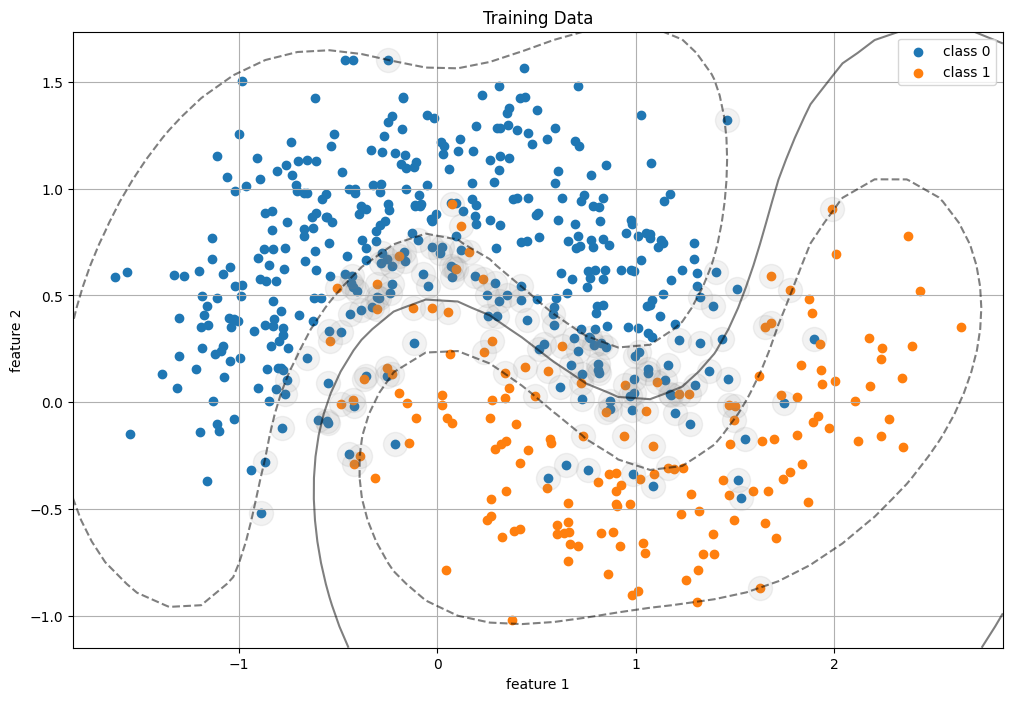

In [60]:
svc = SVC(C=1, kernel="rbf", gamma=1, class_weight="balanced", probability=True)

svc.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
for i in range(2):
    plt.scatter(
        X_train[y_train == i][:, 0], X_train[y_train == i][:, 1], label=f"class {i}"
    )
plt.title("Training Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.grid()
plot_svc_decision_function(svc)
plt.show()

#### 6) Отобразите на графике ROC-кривую для лучшего варианта классификатора.

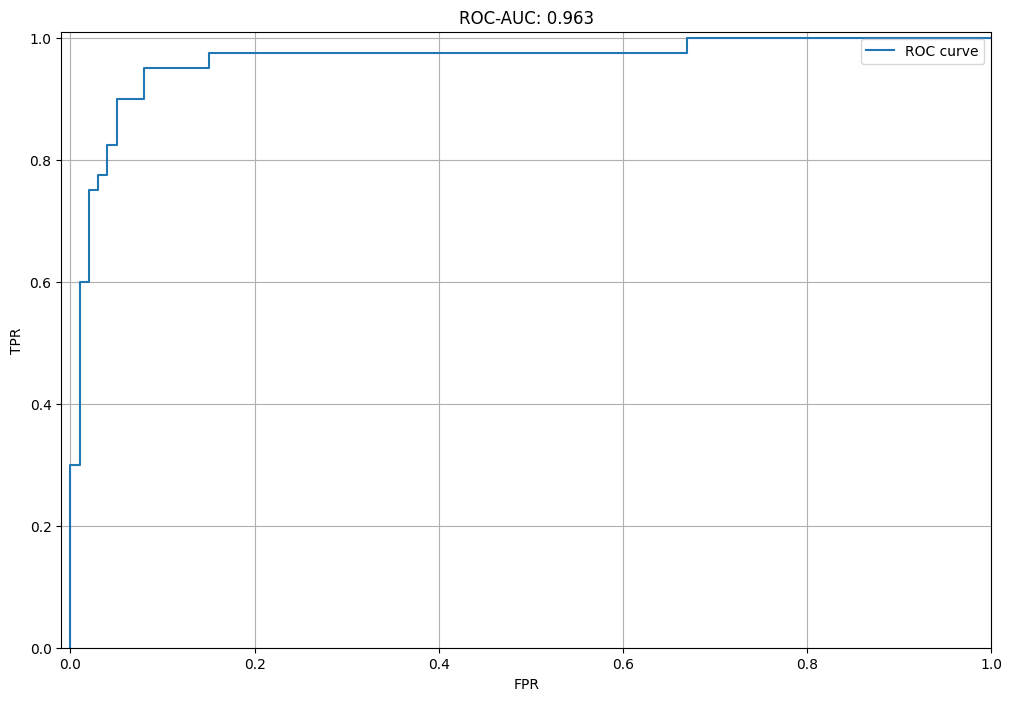

In [61]:
from sklearn.metrics import roc_curve, auc

y_scores = svc.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="ROC curve")
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"ROC-AUC: {roc_auc:.3f}")
plt.legend()
plt.grid()
plt.show()

#### 7) Выведите для лучшего на кросс-валидации классификатора:
    1. ядро, параметры C, gamma, degree (если применимы)
    2. AUC ROC на тестовой выборке
    

In [62]:
best_params = grid_search.best_params_
print(f"Best params: {best_params}")
print(f"ROC-AUC test: {roc_auc}")

Best params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
ROC-AUC test: 0.963


#### 8) Отобразите матрицу ошибок на тестовой выборке (воспользуйтесь confusion_matrix и ConfusionMatrixDisplay).
    
    9. Выведите число ошибок false positive на тестовой выборке

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def show_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    print(f"False positive: {cm[0][1]}")
    print("Confusion matrix:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()

False positive: 8
Confusion matrix:


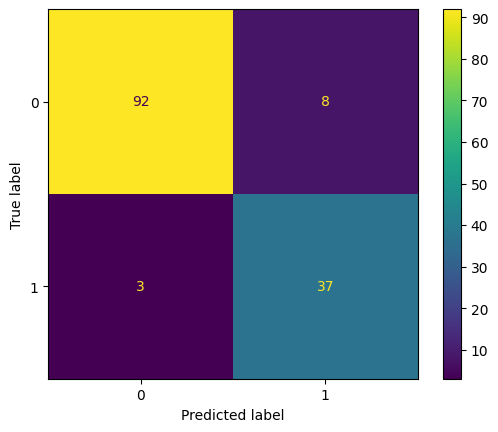

In [64]:
y_pred = grid_search.predict(X_test)
show_confusion_matrix(y_test, y_pred)

#### 9) Посчитайте на тестовой выборке для этой модели:
    1. precision_score
    2. recall_score
    

In [65]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    classification_report,
    f1_score,
    brier_score_loss,
)

print(classification_report(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       100
           1       0.82      0.93      0.87        40

    accuracy                           0.92       140
   macro avg       0.90      0.92      0.91       140
weighted avg       0.93      0.92      0.92       140

Precision: 0.822
Recall: 0.925


#### 10) Посчитайте на тестовой выборке для этой модели:
    1. f1-меру
    2. brier_score (относительно положительного [2-го] класса)

In [66]:
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"Brier Score: {brier_score_loss(y_test, y_scores):.3f}")

F1 Score: 0.871
Brier Score: 0.056
